In [1]:
import cv2
import os 
import glob 

file_dir = 'data/Train/*'
files = glob.glob(file_dir)
# print(files)
x = []
for f1 in files:
    img_dir = os.path.join(f1,'*')
    images = glob.glob(img_dir)
#     print(images)
    for img in images:
        img_temp = cv2.imread(img)
        img_temp = cv2.resize(img_temp,(100,175))
        x.append(img_temp)

In [2]:
import numpy as np
x = np.array(x)

In [3]:
print(x.shape)

(60, 175, 100, 3)


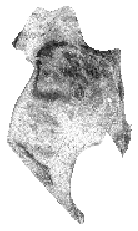

In [4]:
import matplotlib.pyplot as plt
plt.axis("off")
plt.imshow(cv2.cvtColor(x[12], cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
x_right = np.array(x)
for i in range(29):
    print(i)
    x_right = np.concatenate((x_right,x))
print(x_right.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
(1800, 175, 100, 3)


In [6]:
x_left = []
for i in range(len(x)):
    print(i)
    for j in range(30):
        x_left.append(x[i])
        
x_left = np.array(x_left)
print(x_left.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
(1800, 175, 100, 3)


In [7]:
y = []
count = 0
for i in range(30):
    for j in range(60):
        y.append(0)

for i in range(20):
    for j in range(i*30+i*10,i*30+(i+1)*10):
        y[j] = 1                                ## [1,0] -> Same

# for i in range(len(y)):
#     if(sum(y[i]) == 0):
#         y[i][1] = 1                                ## [0,1] -> Different'''

In [8]:
y = np.array(y)

In [9]:
print(y[30])

0


In [10]:
import keras 
from keras.layers import Dense, MaxPooling2D, Convolution2D, Dropout, Input, Flatten, Subtract, concatenate
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.models import Model

inp_1 = Input(shape=(175,100,3))
conv_1 = Convolution2D(64,(10,10),activation='relu')(inp_1)
max_2 = MaxPooling2D((2,2),strides=(2,2))(conv_1)
conv_3 = Convolution2D(128,(7,7),activation='relu')(max_2)
max_4 = MaxPooling2D((2,2),strides=(2,2))(conv_3)
conv_5 = Convolution2D(128,(4,4),activation='relu')(max_4)
max_6 = MaxPooling2D((2,2),strides=(2,2))(conv_5)
conv_7 = Convolution2D(256,(4,4),activation='relu')(max_6)
fcl = Flatten()(conv_7)
dense_1 = Dense(4096,activation='relu')(fcl)

inp_2 = Input(shape=(175,100,3))
conv2_1 = Convolution2D(64,(10,10),activation='relu')(inp_2)
max2_2 = MaxPooling2D((2,2),strides=(2,2))(conv2_1)
conv2_3 = Convolution2D(128,(7,7),activation='relu')(max2_2)
max2_4 = MaxPooling2D((2,2),strides=(2,2))(conv2_3)
conv2_5 = Convolution2D(128,(4,4),activation='relu')(max2_4)
max2_6 = MaxPooling2D((2,2),strides=(2,2))(conv2_5)
conv2_7 = Convolution2D(256,(4,4),activation='relu')(max2_6)
fcl2 = Flatten()(conv2_7)
dense2_1 = Dense(4096,activation='relu')(fcl2)

L1_distance = lambda x: K.abs(x[0]-x[1])
dense_layer = concatenate([dense_1,dense2_1])

out = Dense(1,activation='softmax')(dense_layer)

siamese_net = Model(inputs=[inp_1,inp_2],outputs=out)

print(siamese_net.summary())

Using TensorFlow backend.






__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 175, 100, 3)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 175, 100, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 166, 91, 64)  19264       input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 166, 91, 64)  19264       input_2[0][0]                    
__________________________________________________________________________________________________
max_po

In [11]:
siamese_net.compile(loss='binary_crossentropy',optimizer=keras.optimizers.SGD(lr=0.001),metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
siamese_net.fit([x_left,x_right],y,verbose=1,epochs=1)
siamese_net.save('siamese_net_1.hd5')




Epoch 1/1





1800/1800 [==============================] - 467s 259ms/step - loss: 14.1710 - acc: 0.1111


In [60]:
test_path = 'test_imgs'
files = glob.glob(test_path)
x_test = []
for f1 in files:
    img_dir = os.path.join(f1,'*')
    images = glob.glob(img_dir)
    for img in images:
        print(img)
        img_temp = cv2.imread(img)
        img_temp = cv2.resize(img_temp,(100,175))
        x_test.append(img_temp)
x_test = np.array(x_test)

test_imgs/4.jpg
test_imgs/5.jpg
test_imgs/2.jpg
test_imgs/3.jpg
test_imgs/1.jpg


In [49]:
print(x_test.shape)

(5, 175, 100, 3)


In [51]:
#reference images:
img_pot = x_test[0]
img_roi = x_test[2]

img_pot = img_pot.reshape(1,175,100,3)
img_roi = img_roi.reshape(1,175,100,3)

img_1 = x_test[1]
img_2 = x_test[3]
img_3 = x_test[4]
img_1 = img_1.reshape(1,175,100,3)
img_2 = img_2.reshape(1,175,100,3)
img_3 = img_3.reshape(1,175,100,3)

test_imgs/1.jpg


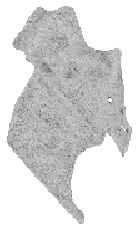

test_imgs/2.jpg


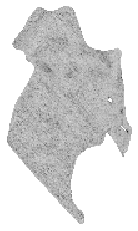

The image belongs to potholes


In [68]:
pred = siamese_net.predict([img_pot,img_1])
plt.axis("off")
print(images[4])
plt.imshow(cv2.cvtColor(x_test[4], cv2.COLOR_BGR2RGB))
plt.show()
plt.axis("off")
print(images[2])
plt.imshow(cv2.cvtColor(x_test[2], cv2.COLOR_BGR2RGB))
plt.show()

if pred == 1:
    print('The image belongs to potholes')

elif pred == 0:
    print('The image belongs to roi')

test_imgs/3.jpg


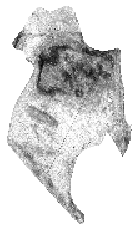

test_imgs/4.jpg


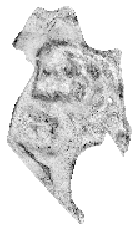

The image belongs to roi


In [69]:
pred = siamese_net.predict([img_roi,img_2])
plt.axis("off")
print(images[3])
plt.imshow(cv2.cvtColor(x_test[3], cv2.COLOR_BGR2RGB))
plt.show()
plt.axis("off")
print(images[0])
plt.imshow(cv2.cvtColor(x_test[0], cv2.COLOR_BGR2RGB))
plt.show()

if pred == 0:
    print('The image belongs to potholes')

elif pred == 1:
    print('The image belongs to roi')

1.0
test_imgs/3.jpg


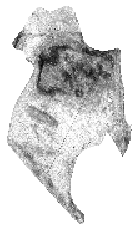

test_imgs/5.jpg


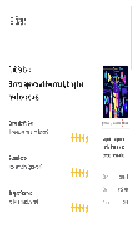

The image belongs to roi


In [74]:
pred = siamese_net.predict([img_roi,img_3])
print(pred[0][0])
plt.axis("off")
print(images[3])
plt.imshow(cv2.cvtColor(x_test[3], cv2.COLOR_BGR2RGB))
plt.show()
plt.axis("off")
print(images[1])
plt.imshow(cv2.cvtColor(x_test[1], cv2.COLOR_BGR2RGB))
plt.show()

if pred == 0:
    print('The image belongs to potholes')

elif pred == 1:
    print('The image belongs to roi')